In [3]:
import sympy as sp
from sympy import init_printing
# init_printing()


Here I define the functions I will need for calculating the berry curvature

In [4]:
def Casimir(Energies,n): #Energies should be a list
    return sum(E**n for E in Energies)

#defining berrycurvature function
def QGT(projector, i ,j):
    diff1 = sp.diff(projector , i)
    diff2 = sp.diff(projector, j)
    middleterm = sp.eye(4)-projector
    product = diff1*middleterm*diff2
    result = sp.trace(product)
    return result

Define my symbols/functions below

In [5]:
# Define kx, ky, kz as symbols
kx, ky, kz = sp.symbols(r'k_x k_y k_z', real=True)

#HAVE to add the prefactors as variables such that I can use it as an input later. Meaning, these are the SOC strength factors.
# lm_x_val_sp = sp.Symbol('lmvalx', real=True)  
# lm_y_val_sp = sp.Symbol('lmvaly', real=True)  
# lm_z_val_sp = sp.Symbol('lmvalz', real=True) 
socvec_sp =  sp.Symbol('socvec', real=True) #a vector for input into energy func

J_x, J_y, J_z = sp.symbols('J_x J_y J_z', real=True)


# Define t_x, t_y, t_z as symbolic functions of kx, ky, kz
t_x = sp.Function('t_x', real=True)(kx, ky, kz)
t_z = sp.Function('t_z', real=True)(kx, ky, kz)

# Define lm_x, lm_y, lm_z as symbolic functions of kx, ky, kz
lm_x = sp.Function(r'lambda_x', real=True)(kx, ky, kz,socvec_sp)
lm_y = sp.Function(r'lambda_y', real=True)(kx, ky, kz,socvec_sp)
lm_z = sp.Function(r'lambda_z', real=True)(kx, ky, kz,socvec_sp)
alpha_s = sp.symbols(r'alpha')
beta_s = sp.symbols(r'beta')
# also energysymbols
energysymbol_asfunc = sp.Function(r'E_a', real=True)(alpha_s,beta_s,kx, ky, kz,J_x,socvec_sp)
energysymbol_tilde_asfunc = sp.Function(r'E_b', real=True)(beta_s,kx, ky, kz,socvec_sp)


# Define the imaginary unit
I = sp.I



# Define t_x, t_y, t_z as symbols
t_x_s = sp.symbols(r't_x', real=True)
t_z_s = sp.symbols(r't_z', real=True)

# Define lm_x, lm_y, lm_z as symbols
lm_x_s = sp.symbols(r'\lambda_x', real=True)
lm_y_s = sp.symbols(r'\lambda_y')
lm_z_s = sp.symbols(r'\lambda_z')

#energysymbols
energysymbol = sp.symbols(r'E_{\alpha\beta}', real=True)
energysymbol_tilde = sp.symbols(r'\tilde{E}_{\beta}', real=True)


Below, I define a function to remove higher orders of SOC in the numerator. It is terribly ugly and hardcoded, so take it with a grain of salt.

Better solution: instead of each term individually, set rule as any power higher than 1.

In [6]:
#OLD: This version is for the symbolic version

# def remove_high_order(terms):
#     parameters = [lm_x_s**3, lm_y_s**3, lm_z_s**3,
#               lm_x_s*lm_y_s**2, lm_x_s*lm_z_s**2, lm_y_s*lm_x_s**2, lm_y_s*lm_z_s**2, lm_z_s*lm_x_s**2, lm_z_s*lm_y_s**2,
#               lm_x_s*lm_y_s*lm_z_s,
#               lm_x_s**4, lm_y_s**4, lm_z_s**4,
#               lm_x_s*lm_y_s**3, lm_x_s*lm_z_s**3, lm_y_s*lm_x_s**3, lm_y_s*lm_z_s**3
#               ]
#     parameters2 = [lm_x_s**2, lm_y_s**2, lm_z_s**2,
#               lm_x_s*lm_y_s, lm_x_s*lm_z_s, lm_y_s*lm_z_s,
#               ]
#     parameters3 = [sp.Derivative(lm_x_s,kx)*lm_x_s, sp.Derivative(lm_x_s,kx)*lm_y_s, sp.Derivative(lm_x_s,kx)*lm_z_s,
#                sp.Derivative(lm_x_s,kz)*lm_x_s, sp.Derivative(lm_x_s,kz)*lm_y_s, sp.Derivative(lm_x_s,kz)*lm_z_s,

#                sp.Derivative(lm_y_s,kx)*lm_x_s, sp.Derivative(lm_y_s,kx)*lm_y_s, sp.Derivative(lm_y_s,kx)*lm_z_s,
#                sp.Derivative(lm_y_s,kz)*lm_x_s, sp.Derivative(lm_y_s,kz)*lm_y_s, sp.Derivative(lm_y_s,kz)*lm_z_s,

#                sp.Derivative(lm_z_s,kx)*lm_x_s, sp.Derivative(lm_z_s,kx)*lm_y_s, sp.Derivative(lm_z_s,kx)*lm_z_s,
#                sp.Derivative(lm_z_s,kz)*lm_x_s, sp.Derivative(lm_z_s,kz)*lm_y_s, sp.Derivative(lm_z_s,kz)*lm_z_s,

#                sp.Derivative(lm_x_s, kx)*sp.Derivative(lm_x_s,kz), sp.Derivative(lm_x_s, kx)*sp.Derivative(lm_y_s,kz), sp.Derivative(lm_x_s, kx)*sp.Derivative(lm_z_s,kz),
#                sp.Derivative(lm_y_s, kx)*sp.Derivative(lm_y_s,kz), sp.Derivative(lm_y_s, kx)*sp.Derivative(lm_z_s,kz),
#                sp.Derivative(lm_z_s, kx)*sp.Derivative(lm_z_s,kz), 

#                sp.Derivative(lm_y_s,kx)*sp.Derivative(lm_x_s, kz), sp.Derivative(lm_z_s, kx)*sp.Derivative(lm_x_s,kz),
#                sp.Derivative(lm_y_s, kx)*sp.Derivative(lm_z_s,kz),
#                ]
#     allparams = parameters+parameters2+parameters3
#     filtered = [term for term in terms if not any(term.has(param) for param in allparams)]

#     return filtered


In [7]:
def remove_high_order(terms):
    parameters = [lm_x**3, lm_y**3, lm_z**3,
              lm_x*lm_y**2, lm_x*lm_z**2, lm_y*lm_x**2, lm_y*lm_z**2, lm_z*lm_x**2, lm_z*lm_y**2,
              lm_x*lm_y*lm_z,
              lm_x**4, lm_y**4, lm_z**4,
              lm_x*lm_y**3, lm_x*lm_z**3, lm_y*lm_x**3, lm_y*lm_z**3
              ]
    parameters2 = [lm_x**2, lm_y**2, lm_z**2,
              lm_x*lm_y, lm_x*lm_z, lm_y*lm_z,
              ]
    parameters3 = [sp.Derivative(lm_x,kx)*lm_x, sp.Derivative(lm_x,kx)*lm_y, sp.Derivative(lm_x,kx)*lm_z,
               sp.Derivative(lm_x,kz)*lm_x, sp.Derivative(lm_x,kz)*lm_y, sp.Derivative(lm_x,kz)*lm_z,

               sp.Derivative(lm_y,kx)*lm_x, sp.Derivative(lm_y,kx)*lm_y, sp.Derivative(lm_y,kx)*lm_z,
               sp.Derivative(lm_y,kz)*lm_x, sp.Derivative(lm_y,kz)*lm_y, sp.Derivative(lm_y,kz)*lm_z,

               sp.Derivative(lm_z,kx)*lm_x, sp.Derivative(lm_z,kx)*lm_y, sp.Derivative(lm_z,kx)*lm_z,
               sp.Derivative(lm_z,kz)*lm_x, sp.Derivative(lm_z,kz)*lm_y, sp.Derivative(lm_z,kz)*lm_z,

               sp.Derivative(lm_x, kx)*sp.Derivative(lm_x,kz), sp.Derivative(lm_x, kx)*sp.Derivative(lm_y,kz), sp.Derivative(lm_x, kx)*sp.Derivative(lm_z,kz),
               sp.Derivative(lm_y, kx)*sp.Derivative(lm_y,kz), sp.Derivative(lm_y, kx)*sp.Derivative(lm_z,kz),
               sp.Derivative(lm_z, kx)*sp.Derivative(lm_z,kz), 

               sp.Derivative(lm_y,kx)*sp.Derivative(lm_x, kz), sp.Derivative(lm_z, kx)*sp.Derivative(lm_x,kz),
               sp.Derivative(lm_y, kx)*sp.Derivative(lm_z,kz),
               sp.Derivative(lm_y, kz)*sp.Derivative(lm_z,kx),

               ]
    allparams = parameters+parameters2+parameters3
    filtered = [term for term in terms if not any(term.has(param) for param in allparams)]

    return filtered


Below, I define the hamiltonian as according to Mercè's minimal model

In [8]:
# Define the vectors J, lm, and m
lm = sp.Matrix([lm_x, lm_y, lm_z])
J = sp.Matrix([J_x, 0,0])

# Define the 4x4 Hamiltonian matrix using vector components
H4x4 = sp.Matrix([
    [t_z + J[2], J[0] - I*(J[1]), t_x - I*lm[2], -I*lm[0] - lm[1]],
    [J[0] + I*(J[1]), t_z - J[2], -I*lm[0] + lm[1], t_x + I*lm[2]],
    [t_x + I*lm[2], I*lm[0] + lm[1], -t_z - J[2], I*(J[1]) - J[0]],
    [I*lm[0] - lm[1], t_x - I*lm[2], -I*J[1] - J[0], -t_z + J[2]]
])

eigenvalues = sp.Matrix(list(H4x4.eigenvals()))
for i in range(len(eigenvalues)):
    eigenvalues[i] = sp.simplify(eigenvalues[i])
# eigenvalues
givenJ = [J[i, j] for i in range(J.rows) for j in range(J.cols) if J[i, j] != 0][0]
Htilde = (1/(2*givenJ))*(H4x4**2 - sp.Rational(1,4)*sp.expand(Casimir(eigenvalues,2))*sp.eye(4)) #sorta hardcoded
htildeeigenvals = sp.Matrix(list(Htilde.eigenvals()))
Htilde= sp.simplify(Htilde)

In [9]:
# Display the matrix if you want by uncommenting line below
#H4x4

In [10]:
#Display the Htilde matrix if you want by uncommenting below
#Htilde

In [11]:
#Display Etilde below if you wish
#htildeeigenvals

Now here is the calculation of the projector

In [12]:
projector_all = sp.Rational(1,4)*(
    (sp.eye(4) + Htilde/energysymbol_tilde_asfunc)*(sp.eye(4) + H4x4/energysymbol_asfunc)
)
projector_all = sp.simplify(projector_all)

qgt_all = QGT(projector_all, kx, kz)
qgt_all = sp.simplify(qgt_all)
# qgt

Below, i find the berry curvature terms IMPORTANT: I select only half the terms (easier to visualize), there is an equal amount of terms with opposite signs, and with the indices of differentiation flipped.

In [13]:
#necessary evil: multiplying by the denominator, otherwise Sympy can't filter the terms
no_denom = qgt_all*sp.denom(qgt_all) 
#finds imaginary part // all terms that have an i on
terms_all = no_denom.as_ordered_terms()
filtered_terms_all = [term for term in terms_all if term.has(I)]
filtered_expr_all = sp.Add(*filtered_terms_all)
filtered_expr_all = filtered_expr_all.subs(I,1) #sets all i's to 1, so I'm just looking at the imaginary part
filtered_expr_all = filtered_expr_all*(-2) # Accounts for the factor 2 when finding berry curvature from QGT


terms2_all = filtered_expr_all.as_ordered_terms()
divisor = sp.denom(qgt_all)
divided_terms = [term * 1/divisor for term in terms2_all]
new_expr_all = sp.Add(*divided_terms)

#Remove every other term - this is because the Berry curvature is anitsymmetric, so I simply remove the terms that have flipped signs and indices.
terms3_all = new_expr_all.as_ordered_terms()
filtered_terms_all_3 = filtered_terms_all = terms3_all[::2]  # This keeps terms at indices 0, 2, 4, ...
new_expr_all = sp.Add(*filtered_terms_all_3)

#THE OTHER ANTISYM PART
filtered_terms_all_3_ANTI = terms3_all[1::2]  # This keeps terms at indices 1, 3, 5, ...
new_expr_all_ANTI = sp.Add(*filtered_terms_all_3_ANTI)

In [14]:
# OLD: replacing all functions with symbols to reduce visual clutter:

# # Define t_x, t_y, t_z as symbols
# t_x_s = sp.symbols(r't_x', real=True)
# t_z_s = sp.symbols(r't_z', real=True)

# # Define lm_x, lm_y, lm_z as symbols
# lm_x_s = sp.symbols(r'\lambda_x', real=True)
# lm_y_s = sp.symbols(r'\lambda_y')
# lm_z_s = sp.symbols(r'\lambda_z')

# #energysymbols
# energysymbol = sp.symbols(r'E_{\alpha\beta}', real=True)
# energysymbol_tilde = sp.symbols(r'\tilde{E}_{\beta}', real=True)


# olds = [t_x,t_z,lm_x,lm_y,lm_z, energysymbol_asfunc, energysymbol_tilde_asfunc]
# replacements = [t_x_s, t_z_s, lm_x_s,lm_y_s, lm_z_s, energysymbol, energysymbol_tilde]

# for i in range(len(olds)):
#     new_expr_all = new_expr_all.subs(olds[i] , replacements[i])


#show
#new_expr_all

In [15]:
print('number of terms:' , len(new_expr_all.as_ordered_terms()))
print('number of anti terms' , len(new_expr_all_ANTI.as_ordered_terms()))

number of terms: 55
number of anti terms 55


In [16]:
#Creating a list of ordered terms for the full expression
termbyterm = new_expr_all.as_ordered_terms()
termbyterm_anti = new_expr_all_ANTI.as_ordered_terms()

In [17]:
#Finding lowest order expression

#List of terms
lowestorder_sym_terms = remove_high_order(new_expr_all.as_ordered_terms())
lowestorder_sym_ANTI_terms = remove_high_order(new_expr_all_ANTI.as_ordered_terms())

#Combined expression
lowestorder_sym = sp.Add(*lowestorder_sym_terms)
lowestorder_sym_ANTI = sp.Add(*lowestorder_sym_ANTI_terms)

#CHECKED THAT THE TERMS ARE THE CORRECT ONES.

In [18]:
lowestorder_sym

J_x*Derivative(lambda_x(k_x, k_y, k_z, socvec), k_x)*Derivative(t_x(k_x, k_y, k_z), k_z)/(8*E_a(alpha, beta, k_x, k_y, k_z, J_x, socvec)**3) + 3*J_x*t_z(k_x, k_y, k_z)**2*Derivative(lambda_x(k_x, k_y, k_z, socvec), k_x)*Derivative(t_x(k_x, k_y, k_z), k_z)/(8*E_a(alpha, beta, k_x, k_y, k_z, J_x, socvec)**3*E_b(beta, k_x, k_y, k_z, socvec)**2) + 3*lambda_x(k_x, k_y, k_z, socvec)*t_z(k_x, k_y, k_z)*Derivative(t_x(k_x, k_y, k_z), k_x)*Derivative(t_z(k_x, k_y, k_z), k_z)/(8*E_a(alpha, beta, k_x, k_y, k_z, J_x, socvec)**3*E_b(beta, k_x, k_y, k_z, socvec)) - 3*t_x(k_x, k_y, k_z)*t_z(k_x, k_y, k_z)*Derivative(lambda_x(k_x, k_y, k_z, socvec), k_x)*Derivative(t_z(k_x, k_y, k_z), k_z)/(8*E_a(alpha, beta, k_x, k_y, k_z, J_x, socvec)**3*E_b(beta, k_x, k_y, k_z, socvec)) + 3*t_z(k_x, k_y, k_z)**2*Derivative(lambda_x(k_x, k_y, k_z, socvec), k_x)*Derivative(t_x(k_x, k_y, k_z), k_z)/(8*E_a(alpha, beta, k_x, k_y, k_z, J_x, socvec)**3*E_b(beta, k_x, k_y, k_z, socvec)) + lambda_x(k_x, k_y, k_z, socvec)*t_

## Numerical stuff

First: write all necessary functions that I need to insert on the symbolic places.

In [19]:
import numpy as np

In [20]:
altermag = True
enable_SOC = True

In [21]:
#EVERYTHING IN THIS CELL IS DOUBLE-CHECKED
#Define hopping parameters
t1= -0.05
t2= 0.7
t3= 0.5
t4= -0.15
t5= -0.4
t6= -0.6
t7= 0.3
t8= 1.7

# Define the parameters
mu = 0.25
if altermag:
    J_n = np.array([0.1,0,0])
else:
    J_n = np.array([0,0,0])
J_x_n,J_y_n,J_z_n= J_n[0], J_n[1], J_n[2]


if enable_SOC:
    socvec = np.array([0.05,0.05,0.17]) #  Note that in tetragonal systems the strength of the SOC is the same in the x and y directions (λ), while it is different for the z component!!
else:
    socvec = np.array([0.0,0.0,0.0])

 
def soc(kx_val,ky_val,kz_val, socvec = socvec):
    lol = [
        socvec[0] * np.sin(kz_val/2) * np.sin(kx_val/2) * np.cos(ky_val/2),
        -socvec[1] * np.sin(kz_val/2) * np.sin(ky_val/2) * np.cos(kx_val/2), # THIS MINUS IS SUPPOSED TO BE HERE for RuO2
        socvec[2] * np.cos(kz_val/2) * np.cos(kx_val/2) * np.cos(ky_val/2) * (np.cos(kx_val) - np.cos(ky_val))
        ]
    return lol 

 
# Energy offset / dispersion
def epsilon_0(kx_val,ky_val,kz_val):
    return t1*(np.cos(kx_val)+np.cos(ky_val)) - mu + t2*np.cos(kz_val) + t3*np.cos(kx_val)*np.cos(ky_val) + t4*(np.cos(kx_val) + np.cos(ky_val))*np.cos(kz_val) + t5*np.cos(kx_val)*np.cos(ky_val)*np.cos(kz_val) 
#Has mu subtracted!!


# Define hopping terms as functions of k 
 
def t_x_n(kx_val,ky_val,kz_val):
    return t8*np.cos(kx_val/2)*np.cos(ky_val/2)*np.cos(kz_val/2)  
 
def t_z_n(kx_val,ky_val,kz_val):
    return t6*np.sin(kx_val)*np.sin(ky_val)+t7*np.sin(kx_val)*np.sin(ky_val)*np.cos(kz_val)

Below I have manually differentiated each of the functions and saved them as a new function. 
It seems like a terribly ineffecient way of going about things, but I don't see any quicker way immediately.

In [22]:
#derivatives of tx #CHECKED
def dtx_dx(kx_val, ky_val, kz_val):
    return -(t8 / 2) * np.sin(kx_val / 2) * np.cos(ky_val / 2) * np.cos(kz_val / 2)

def dtx_dy(kx_val, ky_val, kz_val):
    return -(t8 / 2) * np.cos(kx_val / 2) * np.sin(ky_val / 2) * np.cos(kz_val / 2)

def dtx_dz(kx_val, ky_val, kz_val):
    return -(t8 / 2) * np.cos(kx_val / 2) * np.cos(ky_val / 2) * np.sin(kz_val / 2)


#derivatives of tz #CHECKED
def dtz_dx(kx_val, ky_val, kz_val):
    if altermag:
        return (t6 / 2) * np.cos(kx_val) * np.sin(ky_val) + t7 * np.cos(kx_val) * np.sin(ky_val) * np.cos(kz_val)
    else:
        return 0

def dtz_dy(kx_val, ky_val, kz_val):
    if altermag:
        return (t6 / 2) * np.sin(kx_val) * np.cos(ky_val) + t7 * np.sin(kx_val) * np.cos(ky_val) * np.cos(kz_val)
    else:
        return 0

def dtz_dz(kx_val, ky_val, kz_val):
    if altermag:
        return  - t7 * np.sin(kx_val) * np.sin(ky_val) * np.sin(kz_val)
    else:
        return 0

#derivatives of lmx CHECKED
def dlmx_dx(kx_val, ky_val, kz_val, socvector):
    lm_x_val=socvector[0]
    return (lm_x_val / 2) * np.sin(kz_val / 2) * np.cos(kx_val / 2) * np.cos(ky_val / 2)

def dlmx_dy(kx_val, ky_val, kz_val, socvector):
    lm_x_val=socvector[0]
    return (-lm_x_val / 2) * np.sin(kz_val / 2) * np.sin(kx_val / 2) * np.sin(ky_val / 2)

def dlmx_dz(kx_val, ky_val, kz_val, socvector):
    lm_x_val=socvector[0]
    return (lm_x_val / 2) * np.cos(kz_val / 2) * np.sin(kx_val / 2) * np.cos(ky_val / 2)


#Derivatives of lmy #CHECKED
def dlmy_dx(kx_val, ky_val, kz_val, socvector):
    lm_y_val=socvector[1]
    return (lm_y_val / 2) * np.sin(kz_val / 2) * np.sin(ky_val / 2) * np.sin(kx_val / 2)

def dlmy_dy(kx_val, ky_val, kz_val, socvector):
    lm_y_val=socvector[1]
    return -(lm_y_val / 2) * np.sin(kz_val / 2) * np.cos(ky_val / 2) * np.cos(kx_val / 2)

def dlmy_dz(kx_val, ky_val, kz_val, socvector):
    lm_y_val=socvector[1]
    return -(lm_y_val / 2) * np.cos(kz_val / 2) * np.sin(ky_val / 2) * np.cos(kx_val / 2)

# derivatives of lmz #CHECKED
def dlmz_dx(kx_val, ky_val, kz_val, socvector):
    lm_z_val=socvector[2]
    term1 = -(lm_z_val / 2) * np.cos(kz_val / 2) * np.sin(kx_val / 2) * np.cos(ky_val / 2) * (np.cos(kx_val) - np.cos(ky_val))
    term2 = -lm_z_val * np.cos(kz_val / 2) * np.cos(kx_val / 2) * np.cos(ky_val / 2) * np.sin(kx_val)
    return term1 + term2

def dlmz_dy(kx_val, ky_val, kz_val, socvector):
    lm_z_val=socvector[2]
    term1 = -(lm_z_val / 2) * np.cos(kz_val / 2) * np.cos(kx_val / 2) * np.sin(ky_val / 2) * (np.cos(kx_val) - np.cos(ky_val))
    term2 = lm_z_val * np.cos(kz_val / 2) * np.cos(kx_val / 2) * np.cos(ky_val / 2) * np.sin(ky_val)
    return term1 + term2

def dlmz_dz(kx_val, ky_val, kz_val, socvector):
    lm_z_val=socvector[2]
    return -(lm_z_val / 2) * np.sin(kz_val / 2) * np.cos(kx_val / 2) * np.cos(ky_val / 2) * (np.cos(kx_val) - np.cos(ky_val))



In [23]:

#define energy function of alpha and beta and such #CHECKED
def energyfunc_1(alpha,beta, kx_val,ky_val,kz_val, jx=J_x_n, socvector=socvec):
    soc_x = soc(kx_val,ky_val,kz_val, socvec=socvector)[0]
    soc_y = soc(kx_val,ky_val,kz_val, socvec=socvector)[1]
    soc_z = soc(kx_val,ky_val,kz_val, socvec=socvector)[2]
    tx = t_x_n(kx_val,ky_val,kz_val)
    tz = t_z_n(kx_val,ky_val,kz_val)
    energy = alpha*np.sqrt(jx**2 + soc_x**2 + soc_y**2 + soc_z**2 + tx**2 + tz**2 + 2*beta*jx*np.sqrt(tz**2 + soc_y**2 + soc_z**2))
    return energy

#define energy function of alpha and beta and such
def energy_tilde_1(beta, kx_val,ky_val,kz_val, socvector=socvec):
    # soc_x = soc(kx_val,ky_val,kz_val, socvec=socvector)[0]
    soc_y = soc(kx_val,ky_val,kz_val, socvec=socvector)[1]
    soc_z = soc(kx_val,ky_val,kz_val, socvec=socvector)[2]
    # tx = t_x(kx_val,ky_val,kz_val)
    tz = t_z_n(kx_val,ky_val,kz_val)
    energy = beta*np.sqrt(tz**2 + soc_y**2 + soc_z**2)
    return energy

#DOUBLE CHECK THE ONE ABOVE: SHOULD IT HAVE A JX FACTOR? I don't think so, but to be sure, check with Merce thesis.

#CHECKED
def fermi_dirac_dist_1(alpha,beta, kx_val,ky_val,kz_val, jx=J_x_n, kbT=0.01,socvector=socvec):
    eps = epsilon_0(kx_val,ky_val,kz_val)
    denominator = np.exp((energyfunc_1(alpha,beta, kx_val,ky_val,kz_val, jx, socvector=socvector) + eps)/kbT) + 1
    return 1/denominator

Second: replace all symbolic expressions with the numerical functions and then use lambdify.
lidt en ork men can be done.

In [24]:
#I have to replace all the "Derivative" objects in my expressions with explicit sympy functions before I can get lambdify to work.

#derivatives of lm_x
dlmx_dx_sym = sp.Function('dlmx_dx')(kx, ky, kz,socvec_sp)
dlmx_dy_sym = sp.Function('dlmx_dy')(kx, ky, kz,socvec_sp)
dlmx_dz_sym = sp.Function('dlmx_dz')(kx, ky, kz,socvec_sp)

#Derivatives of lm_y
dlmy_dx_sym = sp.Function('dlmy_dx')(kx, ky, kz,socvec_sp)
dlmy_dy_sym = sp.Function('dlmy_dy')(kx, ky, kz,socvec_sp)
dlmy_dz_sym = sp.Function('dlmy_dz')(kx, ky, kz,socvec_sp)

#derivatives of lm_z
dlmz_dx_sym = sp.Function('dlmz_dx')(kx, ky, kz,socvec_sp)
dlmz_dy_sym = sp.Function('dlmz_dy')(kx, ky, kz,socvec_sp)
dlmz_dz_sym = sp.Function('dlmz_dz')(kx, ky, kz,socvec_sp)


#Derivatives of tz
dtz_dx_sym = sp.Function('dtz_dx')(kx, ky, kz)
dtz_dy_sym = sp.Function('dtz_dy')(kx, ky, kz)
dtz_dz_sym = sp.Function('dtz_dz')(kx, ky, kz)

#Derivatives of tx
dtx_dx_sym = sp.Function('dtx_dx')(kx, ky, kz)
dtx_dy_sym = sp.Function('dtx_dy')(kx, ky, kz)
dtx_dz_sym = sp.Function('dtx_dz')(kx, ky, kz)

#Replacing the J symbols with functions such that I can lambdify them later
# Y and z currently commented out, taking just J along X
J_func_x = sp.Function('J_x_func', real=True)(J_x)
# J_func_y = sp.Function('J_y_func', real=True)(J_y)
# J_func_z = sp.Function('J_z_func', real=True)(J_z)


subsdictionary = {
    sp.Derivative(lm_x, kx): dlmx_dx_sym,
    sp.Derivative(lm_x, ky): dlmx_dy_sym,
    sp.Derivative(lm_x, kz): dlmx_dz_sym,
    # now lmy
    sp.Derivative(lm_y, kx): dlmy_dx_sym,
    sp.Derivative(lm_y, ky): dlmy_dy_sym,
    sp.Derivative(lm_y, kz): dlmy_dz_sym,
    #now lmz
    sp.Derivative(lm_z, kx): dlmz_dx_sym,
    sp.Derivative(lm_z, ky): dlmz_dy_sym,
    sp.Derivative(lm_z, kz): dlmz_dz_sym,
    #now tz
    sp.Derivative(t_z, kx): dtz_dx_sym,
    sp.Derivative(t_z, ky): dtz_dy_sym,
    sp.Derivative(t_z, kz): dtz_dz_sym,
    # now tx
    sp.Derivative(t_x, kx): dtx_dx_sym,
    sp.Derivative(t_x, ky): dtx_dy_sym,
    sp.Derivative(t_x, kz): dtx_dz_sym,

}


In [25]:
#SUBSTITUTING in the full expression
expr_after_subs = new_expr_all.subs(subsdictionary)
expr_anti_after_subs = new_expr_all_ANTI.subs(subsdictionary)

#Substituting in the list of ordered terms (termbyterm)
for i in range(len(termbyterm)):
    termbyterm[i]=termbyterm[i].subs(subsdictionary)

for i in range(len(termbyterm_anti)):
    termbyterm_anti[i]=termbyterm_anti[i].subs(subsdictionary)


In [26]:
# FOR THE LOWEST ORDER EXPRESSION
lowest_order_after_subs = lowestorder_sym.subs(subsdictionary)
lowest_order_anti_after_subs = lowestorder_sym_ANTI.subs(subsdictionary)

#subst. in the list of ordered terms
for i in range(len(lowestorder_sym_terms)):
    lowestorder_sym_terms[i]=lowestorder_sym_terms[i].subs(subsdictionary)

for i in range(len(lowestorder_sym_ANTI_terms)):
    lowestorder_sym_ANTI_terms[i]=lowestorder_sym_ANTI_terms[i].subs(subsdictionary)

In [27]:
from sympy.utilities.lambdify import lambdify

In [28]:
# Create a custom_modules dictionary with your numerical functions and lambda wrappers
custom_modules = {
    'numpy': np,
    #'J_x': J_x_n,
    #Derivatives of lmx
    'dlmx_dx': lambda kx, ky, kz,socvector: dlmx_dx(kx, ky, kz, socvector),
    'dlmx_dy': lambda kx, ky, kz,socvector: dlmx_dy(kx, ky, kz, socvector),
    'dlmx_dz': lambda kx, ky, kz,socvector: dlmx_dz(kx, ky, kz, socvector),

    #DErivatives of lmy
    'dlmy_dx': lambda kx, ky, kz,socvector: dlmy_dx(kx, ky, kz, socvector),
    'dlmy_dy': lambda kx, ky, kz,socvector: dlmy_dy(kx, ky, kz, socvector),
    'dlmy_dz': lambda kx, ky, kz,socvector: dlmy_dz(kx, ky, kz, socvector),
    #Derivatives of lmz
    'dlmz_dx': lambda kx, ky, kz,socvector: dlmz_dx(kx, ky, kz, socvector),
    'dlmz_dy': lambda kx, ky, kz,socvector: dlmz_dy(kx, ky, kz, socvector),
    'dlmz_dz': lambda kx, ky, kz,socvector: dlmz_dz(kx, ky, kz, socvector),
    #Derivatives of tz:
    'dtz_dx':lambda kx,ky,kz : dtz_dx(kx,ky,kz),
    'dtz_dy':lambda kx,ky,kz : dtz_dy(kx,ky,kz),
    'dtz_dz':lambda kx,ky,kz : dtz_dz(kx,ky,kz),
    # Derivatives of tx:
    'dtx_dx':lambda kx,ky,kz : dtx_dx(kx,ky,kz),
    'dtx_dy':lambda kx,ky,kz : dtx_dy(kx,ky,kz),
    'dtx_dz':lambda kx,ky,kz : dtx_dz(kx,ky,kz),    


    # Main functions
    't_x': lambda kx, ky, kz: t_x_n(kx,ky,kz),
    't_z': lambda kx,ky,kz : t_z_n(kx,ky,kz),
    'lambda_x': lambda kx, ky, kz,socvector: soc(kx, ky, kz, socvector)[0],
    'lambda_y': lambda kx, ky, kz,socvector: soc(kx, ky, kz, socvector)[1],
    'lambda_z': lambda kx, ky, kz,socvector: soc(kx, ky, kz, socvector)[2],

    # Energy functions
    'E_a': lambda alpha, beta, kx, ky, kz,jx,socvector: energyfunc_1(alpha, beta, kx, ky, kz, jx,socvector),
    'E_b': lambda beta, kx, ky, kz,socvector: energy_tilde_1(beta, kx, ky, kz,socvector),
}

In [29]:
# Lambdify the FULL expression with appropriate variables
numerical_expr = lambdify((kx, ky, kz, alpha_s,beta_s,J_x,socvec_sp), expr_after_subs, modules=custom_modules)
numerical_expr_anti = lambdify((kx, ky, kz, alpha_s,beta_s, J_x,socvec_sp), expr_anti_after_subs, modules=custom_modules)

#Likewise for the reduced expr:
lowest_numerical_expr = lambdify((kx, ky, kz, alpha_s,beta_s,J_x,socvec_sp), lowest_order_after_subs, modules=custom_modules)
lowest_numerical_expr_anti = lambdify((kx, ky, kz, alpha_s,beta_s, J_x,socvec_sp), lowest_order_anti_after_subs, modules=custom_modules)

Below: I make a list where each element is a function containing the term.

In [30]:
#FULL EXPRESSION
numerical_list = []
for i in range(len(termbyterm)):
    numerical_list.append(lambdify((kx, ky, kz, alpha_s,beta_s,J_x,socvec_sp), termbyterm[i], modules=custom_modules))

numerical_list_anti = []
for i in range(len(termbyterm_anti)):
    numerical_list_anti.append(lambdify((kx, ky, kz, alpha_s,beta_s,J_x,socvec_sp), termbyterm_anti[i], modules=custom_modules))


#LOWEST ORDER EXPRESSION
numerical_list_lowest = []
for i in range(len(lowestorder_sym_terms)):
    numerical_list_lowest.append(lambdify((kx, ky, kz, alpha_s,beta_s,J_x,socvec_sp), lowestorder_sym_terms[i], modules=custom_modules))

numerical_list_anti_lowest = []
for i in range(len(lowestorder_sym_ANTI_terms)):
    numerical_list_anti_lowest.append(lambdify((kx, ky, kz, alpha_s,beta_s,J_x,socvec_sp), lowestorder_sym_ANTI_terms[i], modules=custom_modules))

In [31]:
#Defining to make the list of functions callable
class FunctionList:
    def __init__(self, funcs):
        self.funcs = funcs

    def __call__(self, *args, **kwargs):
        return [f(*args, **kwargs) for f in self.funcs]

In [32]:
num_list_callable = FunctionList(numerical_list) 
num_list_anti_callable = FunctionList(numerical_list_anti) 

#works, use this. Makes the "list" callable, output is each functions output but in a list.
#might be faster than looping over the list of functions.

num_list_callable_lowest = FunctionList(numerical_list_lowest) 
num_list_anti_callable_lowest = FunctionList(numerical_list_anti_lowest) 


In [33]:
print("Testing the two functions for random k-point k=1,1,1, j_x=0.1:")
print("Result from the full expression when summing both the antisym parts",
numerical_expr(1,1,1,1,1,0.1,socvec)+numerical_expr_anti(1,1,1,1,1,0.1,socvec)
)

print("Result from the reduced expression when summing both the antisym parts",
      lowest_numerical_expr(1,1,1,1,1,0.1,socvec)+lowest_numerical_expr_anti(1,1,1,1,1,0.1,socvec)
)
print("Interesting!")

print("Testing if the list version gives me the same result for the same k-point.")
print('Full expression:',
np.sum(num_list_callable(1,1,1,1,1,0.1,socvec) + num_list_anti_callable(1,1,1,1,1,0.1,socvec))
)
print('lowest order expression:',
      np.sum(num_list_callable_lowest(1,1,1,1,1,0.1,socvec)+num_list_anti_callable_lowest(1,1,1,1,1,0.1,socvec))
)

print('Except for some slight rounding, they give the same')

Testing the two functions for random k-point k=1,1,1, j_x=0.1:
Result from the full expression when summing both the antisym parts -0.0021564400573119667
Result from the reduced expression when summing both the antisym parts -0.0004396287240866364
Interesting!
Testing if the list version gives me the same result for the same k-point.
Full expression: -0.002156440057311965
lowest order expression: -0.0004396287240866362
Except for some slight rounding, they give the same


Next up:
1. Create integrand for lowest order expression. Should just be copying the existing one and inserting "_lowest" in appropriate places. OBS: should do the list version, to check that this works. $\checkmark$
2. write integrand
2. Integrate the lowest order expression over a range of SOC to get the AHC as func of SOC for lowest order expression.
3. Check that resulting plot matches the plot I have in my bachelor. Estimate how large neval needs to be.
4. If all good, start long integration.

## Creating integrand

In [34]:
def integrand_termwise(kz_val,ky_val,kx_val, Jx, socvecinput, kbT = 0.01):
    #The fermi functions I will need
    FD_PP  = fermi_dirac_dist_1(1,1,kx_val,ky_val,kz_val, jx=Jx, kbT=kbT, socvector=socvecinput)
    FD_PM  = fermi_dirac_dist_1(1,-1,kx_val,ky_val,kz_val, jx=Jx, kbT=kbT, socvector=socvecinput)
    FD_MP  = fermi_dirac_dist_1(-1,1,kx_val,ky_val,kz_val, jx=Jx, kbT=kbT, socvector=socvecinput)
    FD_MM  = fermi_dirac_dist_1(-1,-1,kx_val,ky_val,kz_val, jx=Jx, kbT=kbT, socvector=socvecinput)


    #-------------------------------------Computing one part of the Berry curvature

    B_1_PP_withFD = np.array(num_list_callable(kx_val,ky_val,kz_val,1,1,Jx,socvecinput)) * FD_PP
    B_1_PM_withFD = np.array(num_list_callable(kx_val,ky_val,kz_val,1,-1,Jx,socvecinput)) * FD_PM
    B_1_MP_withFD = np.array(num_list_callable(kx_val,ky_val,kz_val,-1,1,Jx,socvecinput)) * FD_MP
    B_1_MM_withFD = np.array(num_list_callable(kx_val,ky_val,kz_val,-1,-1,Jx,socvecinput)) * FD_MM


    #Now sum these terms over beta:
    betasum1 = B_1_PP_withFD+B_1_PM_withFD
    betasum2 = B_1_MP_withFD+B_1_MM_withFD
    alphasum = betasum1+betasum2

    #-------------------------------------Repeat process for the antisymmetric part
    B_1_PP_withFD_anti = np.array(num_list_anti_callable(kx_val,ky_val,kz_val,1,1,Jx,socvecinput)) * FD_PP
    B_1_PM_withFD_anti = np.array(num_list_anti_callable(kx_val,ky_val,kz_val,1,-1,Jx,socvecinput)) * FD_PM
    B_1_MP_withFD_anti = np.array(num_list_anti_callable(kx_val,ky_val,kz_val,-1,1,Jx,socvecinput)) * FD_MP
    B_1_MM_withFD_anti = np.array(num_list_anti_callable(kx_val,ky_val,kz_val,-1,-1,Jx,socvecinput)) * FD_MM

    #sum over beta and alpha
    betasum1_anti = B_1_PP_withFD_anti+B_1_PM_withFD_anti
    betasum2_anti = B_1_MP_withFD_anti+B_1_MM_withFD_anti
    alphasum_anti = betasum1_anti+betasum2_anti


    #Two sums remain. I now have 2 arrays, one for each antisymmetric combination
    #Sum these termwise, I then have one long array corresponding to each of the terms in the long QGT expansion.
    #If I sum along the axis of this array, I will have the total Berry curvature summed over bands.
 
    return (1/(2*np.pi)**3)*(alphasum+alphasum_anti)

In [35]:
#Defining the same function, but for the lowest order expression
def integrand_termwise_lowest(kz_val,ky_val,kx_val, Jx, socvecinput, kbT = 0.01):
    #The fermi functions I will need
    FD_PP  = fermi_dirac_dist_1(1,1,kx_val,ky_val,kz_val, jx=Jx, kbT=kbT, socvector=socvecinput)
    FD_PM  = fermi_dirac_dist_1(1,-1,kx_val,ky_val,kz_val, jx=Jx, kbT=kbT, socvector=socvecinput)
    FD_MP  = fermi_dirac_dist_1(-1,1,kx_val,ky_val,kz_val, jx=Jx, kbT=kbT, socvector=socvecinput)
    FD_MM  = fermi_dirac_dist_1(-1,-1,kx_val,ky_val,kz_val, jx=Jx, kbT=kbT, socvector=socvecinput)


    #-------------------------------------Computing one part of the Berry curvature

    B_1_PP_withFD = np.array(num_list_callable_lowest(kx_val,ky_val,kz_val,1,1,Jx,socvecinput)) * FD_PP
    B_1_PM_withFD = np.array(num_list_callable_lowest(kx_val,ky_val,kz_val,1,-1,Jx,socvecinput)) * FD_PM
    B_1_MP_withFD = np.array(num_list_callable_lowest(kx_val,ky_val,kz_val,-1,1,Jx,socvecinput)) * FD_MP
    B_1_MM_withFD = np.array(num_list_callable_lowest(kx_val,ky_val,kz_val,-1,-1,Jx,socvecinput)) * FD_MM


    #Now sum these terms over beta:
    betasum1 = B_1_PP_withFD+B_1_PM_withFD
    betasum2 = B_1_MP_withFD+B_1_MM_withFD
    alphasum = betasum1+betasum2

    #-------------------------------------Repeat process for the antisymmetric part
    B_1_PP_withFD_anti = np.array(num_list_anti_callable_lowest(kx_val,ky_val,kz_val,1,1,Jx,socvecinput)) * FD_PP
    B_1_PM_withFD_anti = np.array(num_list_anti_callable_lowest(kx_val,ky_val,kz_val,1,-1,Jx,socvecinput)) * FD_PM
    B_1_MP_withFD_anti = np.array(num_list_anti_callable_lowest(kx_val,ky_val,kz_val,-1,1,Jx,socvecinput)) * FD_MP
    B_1_MM_withFD_anti = np.array(num_list_anti_callable_lowest(kx_val,ky_val,kz_val,-1,-1,Jx,socvecinput)) * FD_MM


    #sum over beta and alpha
    betasum1_anti = B_1_PP_withFD_anti+B_1_PM_withFD_anti
    betasum2_anti = B_1_MP_withFD_anti+B_1_MM_withFD_anti
    alphasum_anti = betasum1_anti+betasum2_anti


    #Two sums remain. I now have 2 arrays, one for each antisymmetric combination
    #Sum these termwise, I then have one long array corresponding to each of the terms in the long QGT expansion.
    #If I sum along the axis of this array, I will have the total Berry curvature summed over bands.


    return (1/(2*np.pi)**3)*(alphasum+alphasum_anti)

In [36]:
# k_tests = [1,np.pi/2,np.pi]
# k_tests_2 = [1,1,1]
# k_tests_3 = [1,0,1]


# integrand_termwise_lowest(k_tests[0],k_tests[1],k_tests[2], 0.1, socvec, kbT = 0.01)

In [37]:
# print('ktest1',np.sum(integrand_termwise_lowest(k_tests[0],k_tests[1],k_tests[2], 0.1, socvec, kbT = 0.01)))
# print('ktest2',np.sum(integrand_termwise_lowest(k_tests_2[0],k_tests_2[1],k_tests_2[2], 0.1, socvec, kbT = 0.01)))
# print('ktest3',np.sum(integrand_termwise_lowest(k_tests_3[0],k_tests_3[1],k_tests_3[2], 0.1, socvec, kbT = 0.01)))

Now I have a function that outputs each terms contribution, once bands have been summed over.
I now want to integrate each of these terms. As the integral operation is linear, the final integral should just be the sum of these integrals. 
So, I want to integrate each of these list elements, and have the output be a list with the integral values.

Potentielle løsninger:
1. læg sympy lister sammen først, simplify. Vi definerer hver "term" vi er interesserede i som når summen over beta ER lavet. Jeg tænker dette nok bliver nødvendigt, fordi i expansion kunne vi se at divergensen først blev ophøvet af betasummen.
2. I integrand koden, implementer "sympy.limit". Kunne være lidt luksus hvis dette virkede.

In [38]:
unitfactor = -((213914163877964163*np.pi)/2760862562500000)*10**(-6)*(1/(4.48*10**(-8)))

SOCRUNS = []
for i in np.linspace(0.05,0.2,4):
    SOCRUNS.append(i*socvec)

socstrengthfactors1 = np.linspace(0.05,0.2,4)
socstrengthfactors1_old = np.linspace(0,1.5,10)

SOCRUNS2 = []
for i in np.linspace(0,1.5,15):
    SOCRUNS2.append(i*socvec)

In [39]:
# SOCRUNS

In [40]:
import vegas
import csv

# Integration

## OBS: lige nu er lowest sat til order z,y,x. den anden er uændret.

In [41]:
Iterations = 50000
#Allocating arrays for saving
lowest_result = np.zeros((len(SOCRUNS),8))
lowest_std = np.zeros((len(SOCRUNS),8))
lowest_Q = np.zeros((len(SOCRUNS),8))

lowest_sum_result = np.zeros(len(SOCRUNS))
lowest_sum_std = np.zeros(len(SOCRUNS))
lowest_sum_Q = np.zeros(len(SOCRUNS))

with open(f'Lowestorder_newcode_lowalpha_N{Iterations}.csv', mode='w', newline='') as f:
    writer = csv.writer(f)

    # Write header
    writer.writerow(["idx", "soc_value", "component_index", "mean", "sdev", "Q", "is_sum", "sum_mean", "sum_sdev"])

    for idx,i in enumerate(SOCRUNS):
        print('iteration:',idx)
        jx_forwrap = 0.1 #OBSOBS
        kbt_forwrap = 0.01
        socvecforwrap = i
        def wrapper(k_array):
            z,y,x = k_array
            return integrand_termwise_lowest(z,y,x,jx_forwrap,socvecforwrap,kbt_forwrap)

        integ = vegas.Integrator([[-np.pi, np.pi], [-np.pi, np.pi], [-np.pi, np.pi],])
        integ(wrapper,nitn=10,neval=Iterations)
        print('primer done')
        result = integ(wrapper,nitn=10,neval=2*Iterations)
        sum_of_components = sum(result) #calculates sum of each component. This contains both mean and std information, accounting for any covariances and such
        #print('result = %s    Q = %.2f' % (result, result.Q))
        
        #Saving each component
        for comp_idx, res in enumerate(result):
            lowest_result[idx, comp_idx] = res.mean
            lowest_std[idx, comp_idx] = res.sdev        
        lowest_Q[idx, 0] = result.Q

        #Saving sum of components
        lowest_sum_result[idx]=sum_of_components.mean
        lowest_sum_std[idx]=sum_of_components.sdev
        lowest_sum_Q[idx]=result.Q

        # Save individual component results to CSV file
        for comp_idx, gvar_val in enumerate(result):
            writer.writerow([idx, i, comp_idx, gvar_val.mean, gvar_val.sdev, result.Q, 0, "", ""])  # is_sum=0
        
        # Save the summed result in a separate row, marking it as the sum
        writer.writerow([idx, i, "sum", sum_of_components.mean, sum_of_components.sdev, result.Q, 1, sum_of_components.mean, sum_of_components.sdev])  # is_sum=1
        
        # Flush to ensure data is written immediately
        f.flush()


iteration: 0
primer done
iteration: 1
primer done
iteration: 2
primer done
iteration: 3
primer done


In [42]:
len(integrand_termwise(1,1,1, 0.1, socvec, 0.01))

55

In [43]:
Iterations = 50000
#Allocating arrays for saving
full_result = np.zeros((len(SOCRUNS),55))
full_std = np.zeros((len(SOCRUNS),55))
full_Q = np.zeros((len(SOCRUNS),55))

full_sum_result = np.zeros(len(SOCRUNS))
full_sum_std = np.zeros(len(SOCRUNS))
full_sum_Q = np.zeros(len(SOCRUNS))

with open(f'Full_newcode_lowalpha_N{Iterations}.csv', mode='w', newline='') as f:
    writer = csv.writer(f)

    # Write header
    writer.writerow(["idx", "soc_value", "component_index", "mean", "sdev", "Q", "is_sum", "sum_mean", "sum_sdev"])

    for idx,i in enumerate(SOCRUNS):
        print('iteration:',idx)
        jx_forwrap = 0.1 #OBS
        kbt_forwrap = 0.01
        socvecforwrap = i
        def wrapper(k_array):
            z,y,x = k_array
            return integrand_termwise(z,y,x,jx_forwrap,socvecforwrap,kbt_forwrap)

        integ = vegas.Integrator([[-np.pi, np.pi], [-np.pi, np.pi], [-np.pi, np.pi],])
        integ(wrapper,nitn=10,neval=Iterations)
        print('primer done')
        result = integ(wrapper,nitn=10,neval=2*Iterations)
        sum_of_components = sum(result) #calculates sum of each component. This contains both mean and std information, accounting for any covariances and such
        #print('result = %s    Q = %.2f' % (result, result.Q))
        
        #Saving each component
        for comp_idx, res in enumerate(result):
            full_result[idx, comp_idx] = res.mean
            full_std[idx, comp_idx] = res.sdev        
        full_Q[idx, 0] = result.Q

        #Saving sum of components
        full_sum_result[idx]=sum_of_components.mean
        full_sum_std[idx]=sum_of_components.sdev
        full_sum_Q[idx]=result.Q

        # Save individual component results to CSV file
        for comp_idx, gvar_val in enumerate(result):
            writer.writerow([idx, i, comp_idx, gvar_val.mean, gvar_val.sdev, result.Q, 0, "", ""])  # is_sum=0
        
        # Save the summed result in a separate row, marking it as the sum
        writer.writerow([idx, i, "sum", sum_of_components.mean, sum_of_components.sdev, result.Q, 1, sum_of_components.mean, sum_of_components.sdev])  # is_sum=1
        
        # Flush to ensure data is written immediately
        f.flush()


iteration: 0
primer done
iteration: 1
primer done
iteration: 2
primer done
iteration: 3
primer done


In [44]:
#select a column like this:
#lowest_result[:,0]
# This allows for checking eavh term independently, plot as func of alpha_SOC


# plotting

In [45]:
import matplotlib.pyplot as plt

<ErrorbarContainer object of 3 artists>

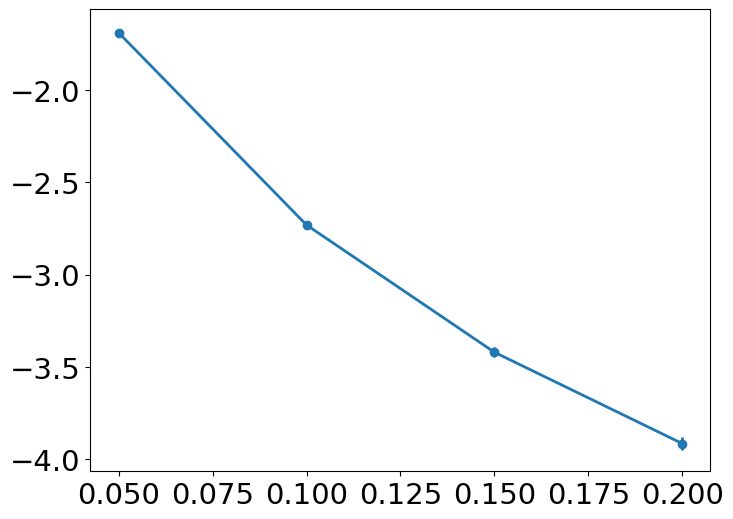

In [46]:
fig_total, axs_total = plt.subplots(figsize=(8,6))
scale_factor_tick = 0.035
scale_factor_label = 0.055
fig_total_width, fig_total_height = fig_total.get_size_inches()

label_size= min(fig_total_width, fig_total_height)*scale_factor_label*100
tick_size= min(fig_total_width, fig_total_height)*scale_factor_tick*100

axs_total.tick_params(axis='both', which='major', labelsize=tick_size)
axs_total.tick_params(axis='both', which='minor', labelsize=tick_size/1.5)
axs_total.xaxis.label.set_size(label_size)
axs_total.yaxis.label.set_size(label_size)


# print(fr'currently j={jx_forwrap} for the m $\neq$ 0')
axs_total.errorbar(socstrengthfactors1,unitfactor*lowest_sum_result,yerr=abs(unitfactor)*lowest_sum_std, fmt='o-', label=r'$M_y=0$', linewidth=2)

In [47]:
# import pandas as pd
# df = pd.read_csv("TESTintegration_results.csv")

# # Extract summed results only
# # Extract summed results only (where is_sum == 1)
# summed_results = df[df["is_sum"] == 1][["soc_value", "sum_mean", "sum_sdev"]]

# # Sort by `soc_value` (just in case the order is not guaranteed)
# summed_results = summed_results.sort_values("soc_value")

# print(summed_results)
 

In [48]:
# summed_results['soc_value']

# plt.errorbar(socstrengthfactors1 , unitfactor*summed_results["sum_mean"], 
#              yerr=abs(unitfactor)*summed_results["sum_sdev"], fmt='o-', capsize=4, label="Summed Integral")